# Figure 1: Manybody potential

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools
import colors

## Setup colors for plots

In [36]:
plot_colors = colors.get_linear_colors('viridis',10)

In [2]:
plotDir = "./plots/"

In [3]:
Vmesh = np.loadtxt('data/Vmesh.raw')
rmeshpoints = np.loadtxt('data/rmeshpoints.raw')
stackedcutpoints = np.loadtxt('data/stackedcutpoints.raw')

In [4]:
x = rmeshpoints[:,0]
y = rmeshpoints[:,1]
z = Vmesh

In [5]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[np.min(rmeshpoints[:,0]):np.max(rmeshpoints[:,0]):1000j, np.min(rmeshpoints[:,1]):np.max(rmeshpoints[:,1]):1000j]
grid_z0 = griddata((x,y), Vmesh, (grid_x, grid_y), method='nearest')
grid_z1 = griddata((x,y), Vmesh, (grid_x, grid_y), method='linear')
grid_z2 = griddata((x,y), Vmesh, (grid_x, grid_y), method='cubic')

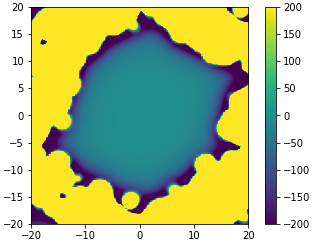

In [6]:
extent = (np.min(x),np.max(x),np.min(y),np.max(y))
fig,ax=plt.subplots()
im = ax.imshow(grid_z1.T,origin='lower',extent=extent,vmax=200,vmin=-200)
cbar = fig.colorbar(im)
# fn = 'test'
# fig.savefig(fn + '.svg')
# fig.savefig(fn + '.png',dpi=400)

In [7]:
ax1,ax2,ay1,ay2 = np.load('data/mcm41UCdata.npy')

In [8]:
xArr = []
yArr = []
zArr = []
for i in range(-3,3+1):
    for j in range(-3,3+1):
        xArr.append(x+(ax1*i + ax2*j))
        yArr.append(y+(ay1*i + ay2*j))
        zArr.append(z)
xx = np.array(xArr).flatten()
yy = np.array(yArr).flatten()
zz = np.array(zArr).flatten()

In [9]:
from scipy.interpolate import griddata
xmin = -60
xmax = 60
ymin = -60
ymax = 60
grid_x, grid_y = np.mgrid[xmin:xmax:10000j, ymin:ymax:10000j]
#grid_z0 = griddata((x,y), Vmesh, (grid_x, grid_y), method='nearest')
grid_z1 = griddata((xx,yy), zz, (grid_x, grid_y), method='linear')
#grid_z2 = griddata((x,y), Vmesh, (grid_x, grid_y), method='cubic')

<a id='section2'></a>

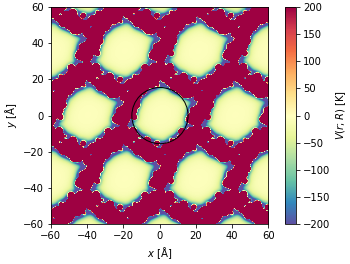

In [10]:
from matplotlib.patches import Circle

extent = (xmin,xmax,ymin,ymax)
fig,ax=plt.subplots()
ax.set_aspect('equal')
im = ax.imshow(grid_z1.T,origin='lower',extent=extent,vmax=200,vmin=-200,cmap="Spectral_r")
circ = Circle((.2,0),15.51,facecolor='None',edgecolor='k')
ax.add_patch(circ)
cbar = fig.colorbar(im)
ax.set_xlabel(r'$x$ $\mathrm{[\AA]}$')
ax.set_ylabel(r'$y$ $\mathrm{[\AA]}$')
cbar.set_label(r'$V(r;R)$ $\mathrm{[K]}$')
fn = 'manybodyPotential'
#fig.savefig(plotDir + fn + '.svg')
fig.savefig(plotDir + fn + '.pdf')
#fig.savefig(plotDir + fn + '.png',dpi=400)


# Figure 2: Effective potential

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools

In [12]:
from scipy.special import ellipk, ellipe

def V(rho,sigma,n,R):
    pf = np.pi*n*(sigma**3)/3.0
    t9 = v9(rho/R)*((sigma/R)**9)
    t3 = v3(rho/R)*((sigma/R)**3)
    return pf*(t9-t3)

def Vshell(rho,sigma,n,R1,R2):
    pf = np.pi*n*(sigma**3)/3.0
    t9 = v9(rho/R1)*((sigma/R1)**9)
    t3 = v3(rho/R1)*((sigma/R1)**3)
    y9 = v9(rho/R2)*((sigma/R2)**9)
    y3 = v3(rho/R2)*((sigma/R2)**3)
    return pf*(y3-y9+t9-t3)

def v9(x):
    pf = 1.0/(240.0*((1.0-(x**2))**9))
    t1 = (1091.0 + (11156.0*(x**2)) + (16434.0*(x**4)) + (4052.0*(x**6)) + (35*(x**8)))*ellipe(x**2)
    t2 = 8.0 * (1.0-(x**2)) * (1.0 + (7.0*(x**2))) * (97.0 + (134.0*(x**2)) + (25.0*(x**4))) * ellipk(x**2)
    return pf*(t1-t2)

def v3(x):
    pf = 2.0/((1.0-(x**2))**3)
    t1 = (7.0 + (x**2)) * ellipe(x**2)
    t2 = 4.0 * (1.0-(x**2)) * ellipk(x**2)
    return pf*(t1-t2)

def U_LJ(r,sigma,epsilon):
    pf = 4.0 * epsilon
    t12 = (sigma/r)**12
    t6 = (sigma/r)**6
    return pf * (t12 - t6)

In [13]:
R = 15.51
R2 = R + 3.76
ss = 3.02250
es = 3.61361

In [14]:
# sigma and epsilon parameters for atoms in silica and helium
# See https://doi.org/10.1016/j.apsusc.2015.01.084 and https://doi.org/10.1016/S0927-7757(01)00628-8
sigmaarr = np.array([(3.804,3.033,2.846,2.640,3.405,2.782)],dtype=[('Si','f'),('O','f'),('H','f'),('He','f'),('Ar','f'),('Ne','f')])
epsilonarr = np.array([(155.858,48.115,0.0503,10.9,119.8,37.29134539)],dtype=[('Si','f'),('O','f'),('H','f'),('He','f'),('Ar','f'),('Ne','f')])

# functions to mix the LJ parameters
# See https://doi.org/10.1016/S0927-7757(01)00628-8
def mixsigma(s1,s2):
    return (s1+s2)/2.0

def mixepsilon(e1,e2):
    return (e1*e2)**0.5

In [15]:
r = np.linspace(0,17,10000)
V_MCM41 = V(r,3.44,1.59,R)

In [16]:
# Argon density
SA = 915.0*1e20 #surface area \AA^2/g
MLC = 8.994e-3 #monolayer argon coverage mol/g
n_2d = 6.022140857e23*MLC/SA #argon atoms per \AA^2
n_3d = n_2d/3.5
n_3dArPaulWiki = n_3d




# Neon Density
argonMass = 39.948 #g/mole
argonRadius = 188e-12 #m
NA = 6.022140758e23 #atoms/mole
L_to_m3 = 0.001 #m^3/L

argonDensitySolid = 1616 #g/L
n_3dArFromSolidDensity = (((argonDensitySolid/L_to_m3)/argonMass)*NA*((1e-10)**3)) #atoms/m^3

argonDensityLiquid = 1395.4 #g/L
n_3dArFromLiquidDensity = (((argonDensityLiquid/L_to_m3)/argonMass)*NA*((1e-10)**3)) #atoms/m^3

argonDensityArr = [n_3dArFromSolidDensity,n_3dArFromLiquidDensity,n_3dArPaulWiki]

print(r'{:.3f}$\mathrm{{Å}}^{{-3}}$'.format(n_3d))

0.017$\mathrm{Å}^{-3}$


In [17]:
sArHe = mixsigma(sigmaarr['He'],sigmaarr['Ar'])
eArHe = mixepsilon(epsilonarr['He'],epsilonarr['Ar'])
print(sArHe)
print(eArHe)

[3.0225]
[36.13613]


In [18]:
vdwrAr = 1.88

In [19]:
V_ArArr = []
for n_3dAr in argonDensityArr:
    V_Ar = Vshell(r,sArHe,eArHe*n_3dAr,R-(vdwrAr*2),R)
    V_ArArr.append(V_Ar)

In [20]:
#np.savetxt('HeArMCM41.dat',np.vstack((r,V_ArArr[-1])).T)

In [21]:
effective_potential_Ar = (np.array(V_ArArr) + V_MCM41)

In [22]:
effective_potential_Ar.T

array([[-9.27723897, -8.96220753, -8.57164939],
       [-9.27723952, -8.96220805, -8.57164987],
       [-9.27724119, -8.96220962, -8.57165131],
       ...,
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])

In [23]:
effective_potential_Ar2 = np.zeros((effective_potential_Ar.shape[1],4))

In [24]:
effective_potential_Ar2[:,0] = r
effective_potential_Ar2[:,1:] = effective_potential_Ar.T

In [25]:
effective_potential_Ar2[:,0]

array([0.00000000e+00, 1.70017002e-03, 3.40034003e-03, ...,
       1.69965997e+01, 1.69982998e+01, 1.70000000e+01])

In [26]:
np.save("data/effective_potential_Ar",effective_potential_Ar2)

In [27]:
np.save("data/argon_density",np.array(argonDensityArr))

## Load and make plot

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools

In [29]:
R = 15.51
effective_potential_Ar = np.load("data/effective_potential_Ar.npy")
argonDensityArr = np.load("data/argon_density.npy")

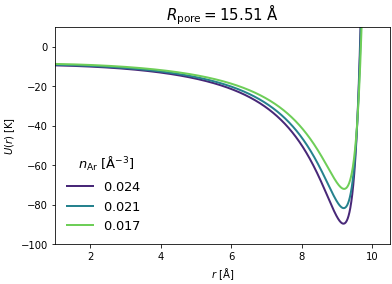

In [45]:
fig,ax = plt.subplots()
ax.set_ylim((-100,10))
ax.set_xlim((1,10.5))
ax.set_xlabel(r'$r$ $\mathrm{[\AA]}$')
ax.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
ax.set_title(r'$R_\mathrm{{pore}}={}\ \mathrm{{\AA}}$'.format(R),pad=-20,fontsize=15)

#cBlue = colortools.get_linear_colors('Blues_r',len(V_NeArr)+5,reverse=False)
#cRed = colortools.get_linear_colors('Reds_r',effective_potential_Ar.shape[1]+4,reverse=False)

#ax.plot(r,V_MCM41,linestyle=':',color='k')
#ax.plot([0], marker='None', linestyle='None', label=r'$n_\mathrm{Ne}\ \mathrm{[\AA^{-3}]}$')
ax.text(0.07,0.35,r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$',transform=ax.transAxes,fontsize=13)

r = effective_potential_Ar[:,0]
for j in range(effective_potential_Ar.shape[1] - 1):
    V_eff = effective_potential_Ar[:,j+1]
    ax.plot(r,V_eff,label='${:2.3f}$'.format(argonDensityArr[j]),color=plot_colors[3*j+1], lw=2)
l = ax.legend(frameon=False,ncol=1,fontsize=13)
#fig.savefig('plots/EP_Ar.svg',bbox_inches='tight')
#fig.savefig('plots/EP_Ar.png',bbox_inches='tight',dpi=400)
fig.savefig('plots/effectivePotential.pdf',bbox_inches='tight')

### Notes on this plot
- move legend to upper right corner
- move lower plot as inset
- use stylefile

In [31]:
min_potential = []
min_potential_location = []
min_potential_density = []

for j in range(effective_potential_Ar.shape[1] - 1):
    idx_min_potential = np.argmin(effective_potential_Ar[r < 10,j+1])
    min_potential.append(effective_potential_Ar[idx_min_potential,j+1])
    min_potential_location.append(r[idx_min_potential])
    min_potential_density.append(argonDensityArr[j])

Text(0, 0.5, '$U(r)$ $\\mathrm{[K]}$')

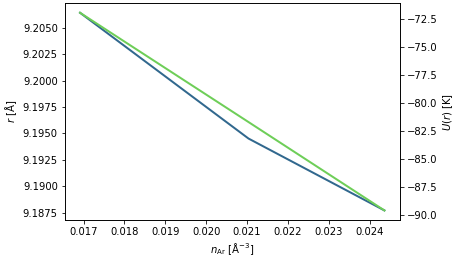

In [40]:
# Do many densities here and put a line through them, hilight three points from other plot
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(min_potential_density,min_potential_location, color=plot_colors[3], lw=2)
ax2.plot(min_potential_density,min_potential, color=plot_colors[-3], lw=2)
ax.set_xlabel(r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$')
ax.set_ylabel(r'$r$ $\mathrm{[\AA]}$')
ax2.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')

### Notes on this plot
- we will include this as an inset in the upper plot
- use annotate to make left and right arrow indicating axis of curve
- change colors of two curves and  use a legend
- use points to indicate curves above
- switch to style file

In [33]:
min_potential

[-89.5617547639527, -81.70041844800937, -71.977433481231]